In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [7]:
# Display settings for pandas and matplotlib
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('ggplot')

In [8]:
print("Libraries imported and environment configured.")

Libraries imported and environment configured.


In [9]:
# Load the dataset from the correct sheet
pcos_dataset_filename = 'PCOS_data_without_infertility.xlsx'
sheet_index = 1  # Sheet 2 (Python uses 0-based indexing)

In [10]:
df = pd.read_excel('PCOS_data_without_infertility.xlsx', sheet_name=1)
print("Loaded successfully!")

Loaded successfully!


In [11]:
# Inspect the data
print("\n--- First 5 rows of the dataset ---")
print(df.head())


--- First 5 rows of the dataset ---
   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  Cycle length(days)  Marraige Status (Yrs)  Pregnant(Y/N)  No. of aborptions    I   beta-HCG(mIU/mL) II    beta-HCG(mIU/mL)  FSH(mIU/mL)  LH(mIU/mL)    FSH/LH  Hip(inch)  Waist(inch)  Waist:Hip Ratio  TSH (mIU/L) AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm) Unnamed: 44
0       1                 1           0          28         44.6        152.0  19.300000           15                78                22     10.48           2                   5                    7.0              0                  0              

In [12]:
print("\n--- Dataset Information (Columns, Non-Null Counts, Data Types) ---")
df.info()


--- Dataset Information (Columns, Non-Null Counts, Data Types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540

In [13]:
print("\n--- Basic Statistical Summary of Numerical Columns ---")
print(df.describe())


--- Basic Statistical Summary of Numerical Columns ---
           Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)          BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)    Hb(g/dl)  Cycle(R/I)  Cycle length(days)  Marraige Status (Yrs)  Pregnant(Y/N)  No. of aborptions    I   beta-HCG(mIU/mL)  FSH(mIU/mL)   LH(mIU/mL)       FSH/LH   Hip(inch)  Waist(inch)  Waist:Hip Ratio  TSH (mIU/L)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  RBS(mg/dl)  Weight gain(Y/N)  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)
count  541.000000        541.000000  541.000000  541.000000   541.000000   541.000000  541.000000   541.000000        541.000000        541.000000  541.000000  541.000000           541.00000             540.000000     541.000000         541.000000              

In [14]:

target_column_name = 'PCOS (Y/N)'
if target_column_name in df.columns:
    print(df[target_column_name].value_counts())
    print(f"Percentage of PCOS cases (1) in the dataset: {df[target_column_name].value_counts(normalize=True).get(1, 0) * 100:.2f}%")
else:
    print(f"Target column '{target_column_name}' not found. Available columns: {df.columns.tolist()}")
    exit()  # Stop execution if target not found

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64
Percentage of PCOS cases (1) in the dataset: 32.72%


In [15]:
# Data inspection for cleaning and preprocessing
print("\n--- Columns and Data Types ---")
print(df.dtypes)


--- Columns and Data Types ---
Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)      

In [16]:
print("\n--- Number of Missing Values per Column ---")
print(df.isnull().sum())


--- Number of Missing Values per Column ---
Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)         

In [17]:
print("\n--- Columns with Object (Non-Numeric) Data Types ---")
object_cols = df.select_dtypes(include=['object']).columns
print(object_cols)


--- Columns with Object (Non-Numeric) Data Types ---
Index(['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)', 'Unnamed: 44'], dtype='object')


In [18]:
print("\n--- Unique Values in Categorical Columns ---")
for col in object_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


--- Unique Values in Categorical Columns ---

Column: II    beta-HCG(mIU/mL)
[1.99 494.08 801.45 100.51 158.51 1214.23 91.55 749.98 218.65 13 610.63
 4490.18 11.24 15 768.03 12 10 20 30.66 1455 497.41 167 9.83 141.06 528.5
 177.57 65.03 173.66 161.49 3.98 756.61 255.02 273.7 14.46 145.89 100.09
 110.17 174.37 75.51 3893.06 600.23 3350.19 97.63 14.4 2 177.58 12.17 25.3
 100.2 479.66 1.9 586.06 '1.99.' 2.8 15.36 54.08 152.13 3.05 201.36
 16069.69 57.08 232.71 23.5 180.3 102.3 481.3 563.8 4.32 230.5 155.3 3.888
 523.6 1.65 3.83 569.1 236.5 896.6 2.58 569.3 108.66 3.99 121.8 122.58
 355.28 122.3 596.2 588.7 147.6 12.37 144.63 475.04 515.53 99.69 70.42
 342.91 148.52 272.78 355.51 150.91 391.46 464.12 41.77 1390.58 213.83
 45.9 18.36 154.48 25000 638.52 4.76 18.13 89.34 366.04 14.34 75.62 4.96
 1134.4 785.95 229.86 3.9 297.21 277.28 783.36 21084.21 409.85 410.13
 479.6 545.78 320.49 78.38 204.69 900.6 159.71 296.31 4176 183.06 161.77
 61.98 403.85 34.65 48.86 371.74 970.75 109.06 1082.82 7

In [19]:
# Drop the irrelevant/junk column
df = df.drop(columns=['Unnamed: 44'])

In [20]:
# Check which columns have missing values
print(df.isnull().sum())


Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [21]:
# See which columns are still object (non-numeric)
object_cols = df.select_dtypes(include=['object']).columns
print("Object columns:", object_cols)

Object columns: Index(['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'], dtype='object')


In [22]:
# Try to convert object columns to numeric, coercing errors to NaN
for col in object_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [23]:
# Drop rows with any missing values
df = df.dropna()


In [24]:
# Confirm the data is now clean and numeric
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  537 non-null    int64  
 1   Patient File No.        537 non-null    int64  
 2   PCOS (Y/N)              537 non-null    int64  
 3    Age (yrs)              537 non-null    int64  
 4   Weight (Kg)             537 non-null    float64
 5   Height(Cm)              537 non-null    float64
 6   BMI                     537 non-null    float64
 7   Blood Group             537 non-null    int64  
 8   Pulse rate(bpm)         537 non-null    int64  
 9   RR (breaths/min)        537 non-null    int64  
 10  Hb(g/dl)                537 non-null    float64
 11  Cycle(R/I)              537 non-null    int64  
 12  Cycle length(days)      537 non-null    int64  
 13  Marraige Status (Yrs)   537 non-null    float64
 14  Pregnant(Y/N)           537 non-null    int64  

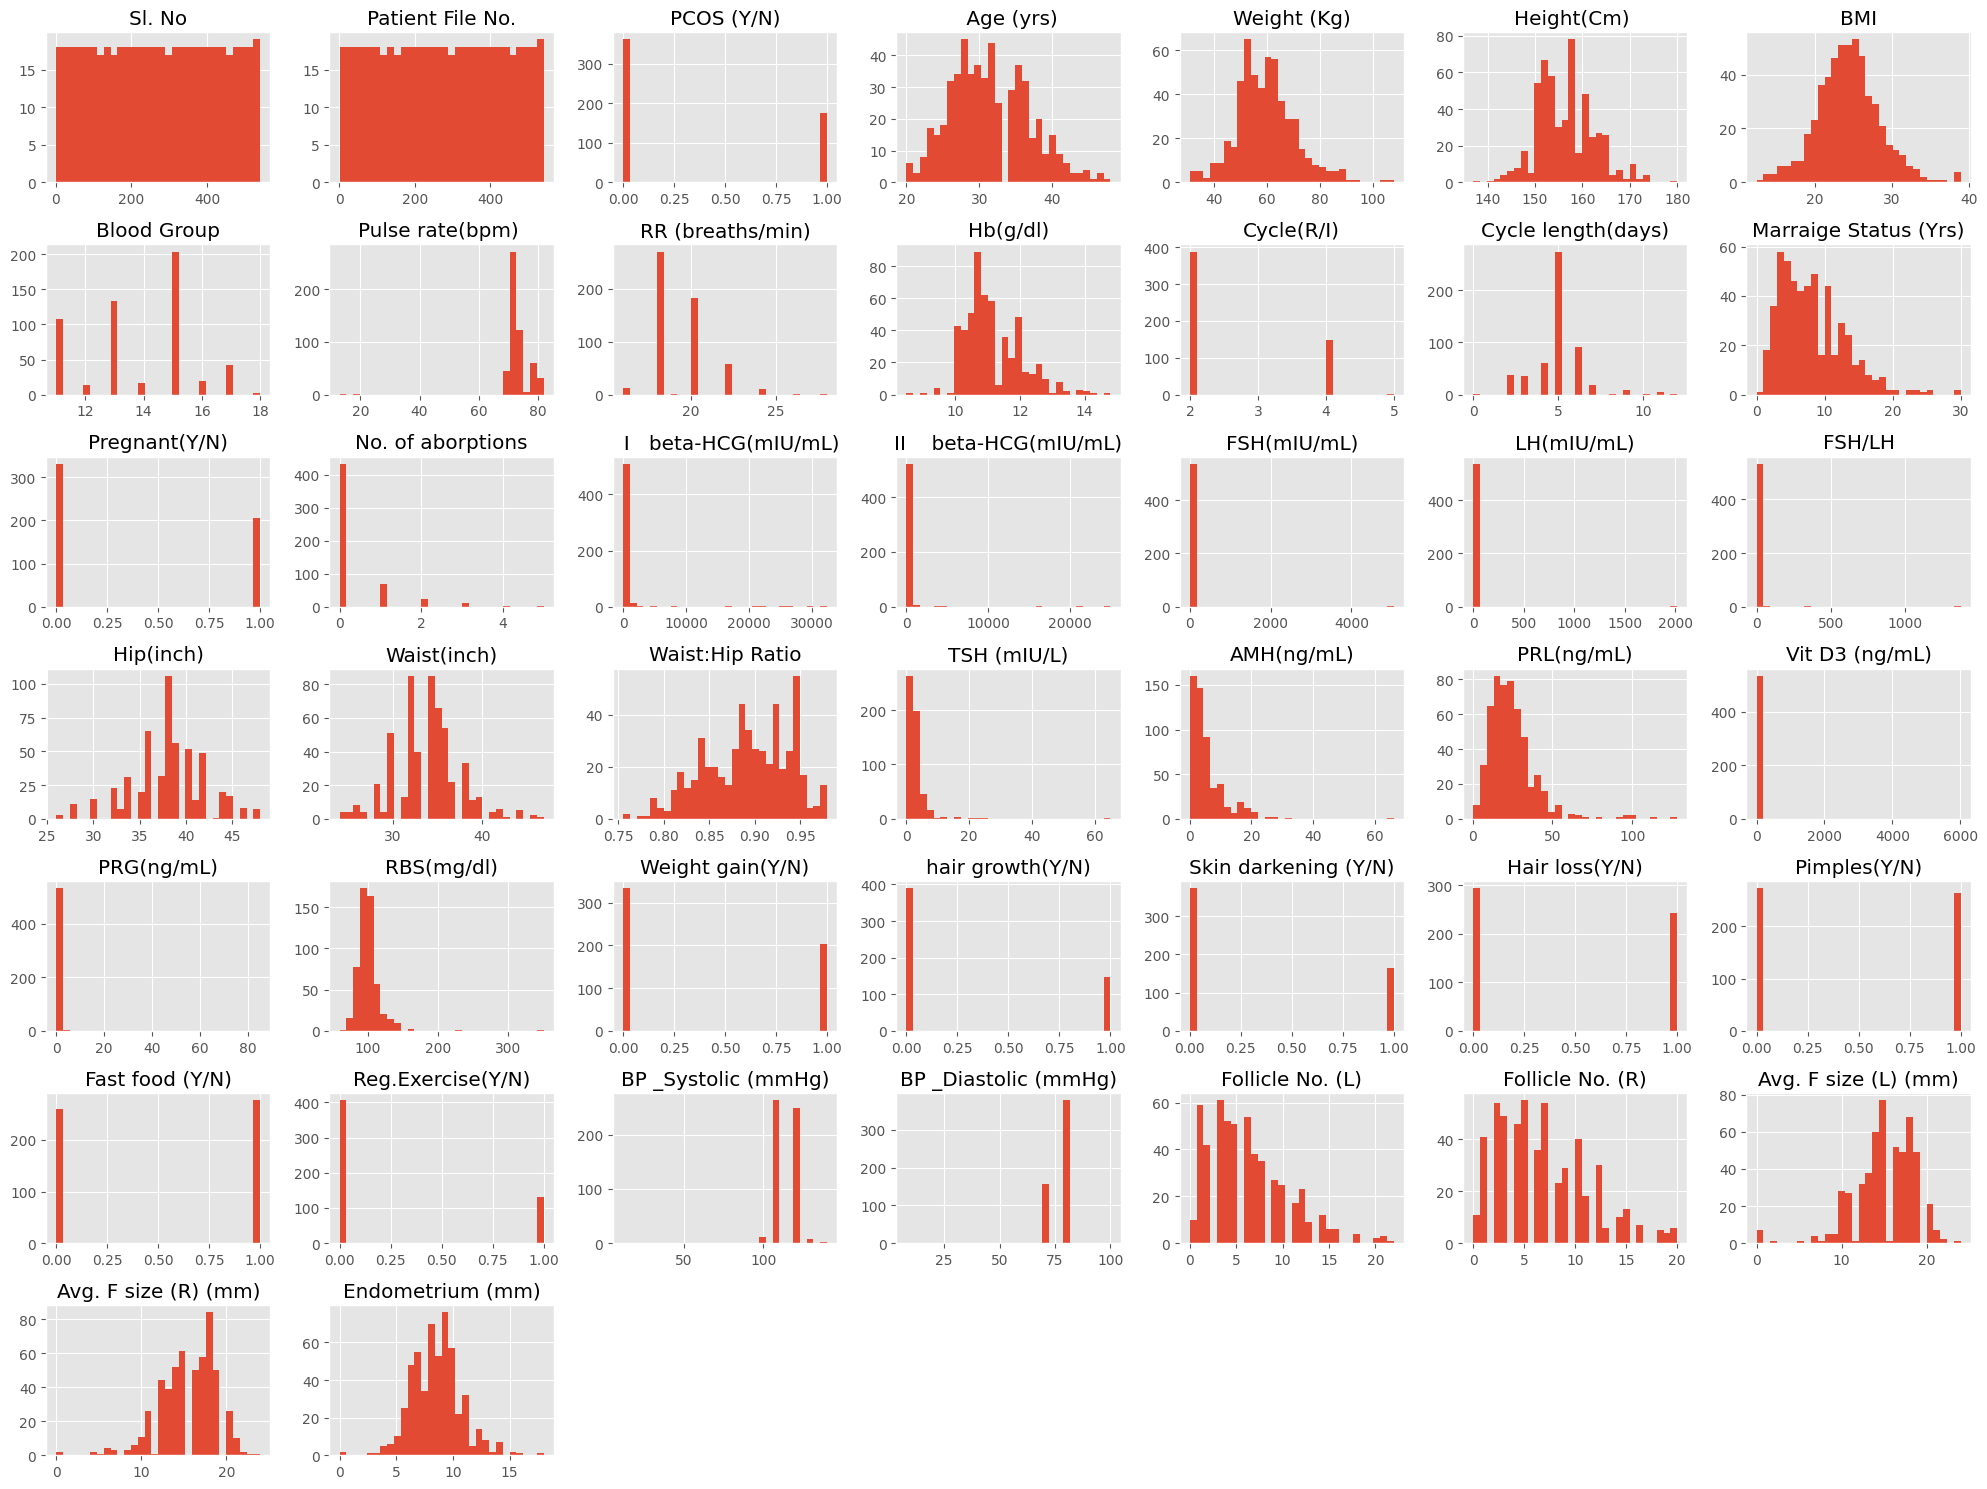

In [25]:
df.hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

After observation, I decided to remove identifier colums from the dataset, like Patient file No. I also decided to remove Marriage status.

In [26]:
# Drop identifier and non-informative columns
df = df.drop(columns=[
    'Sl. No',
    'Patient File No.',
    'Marraige Status (Yrs)'
])

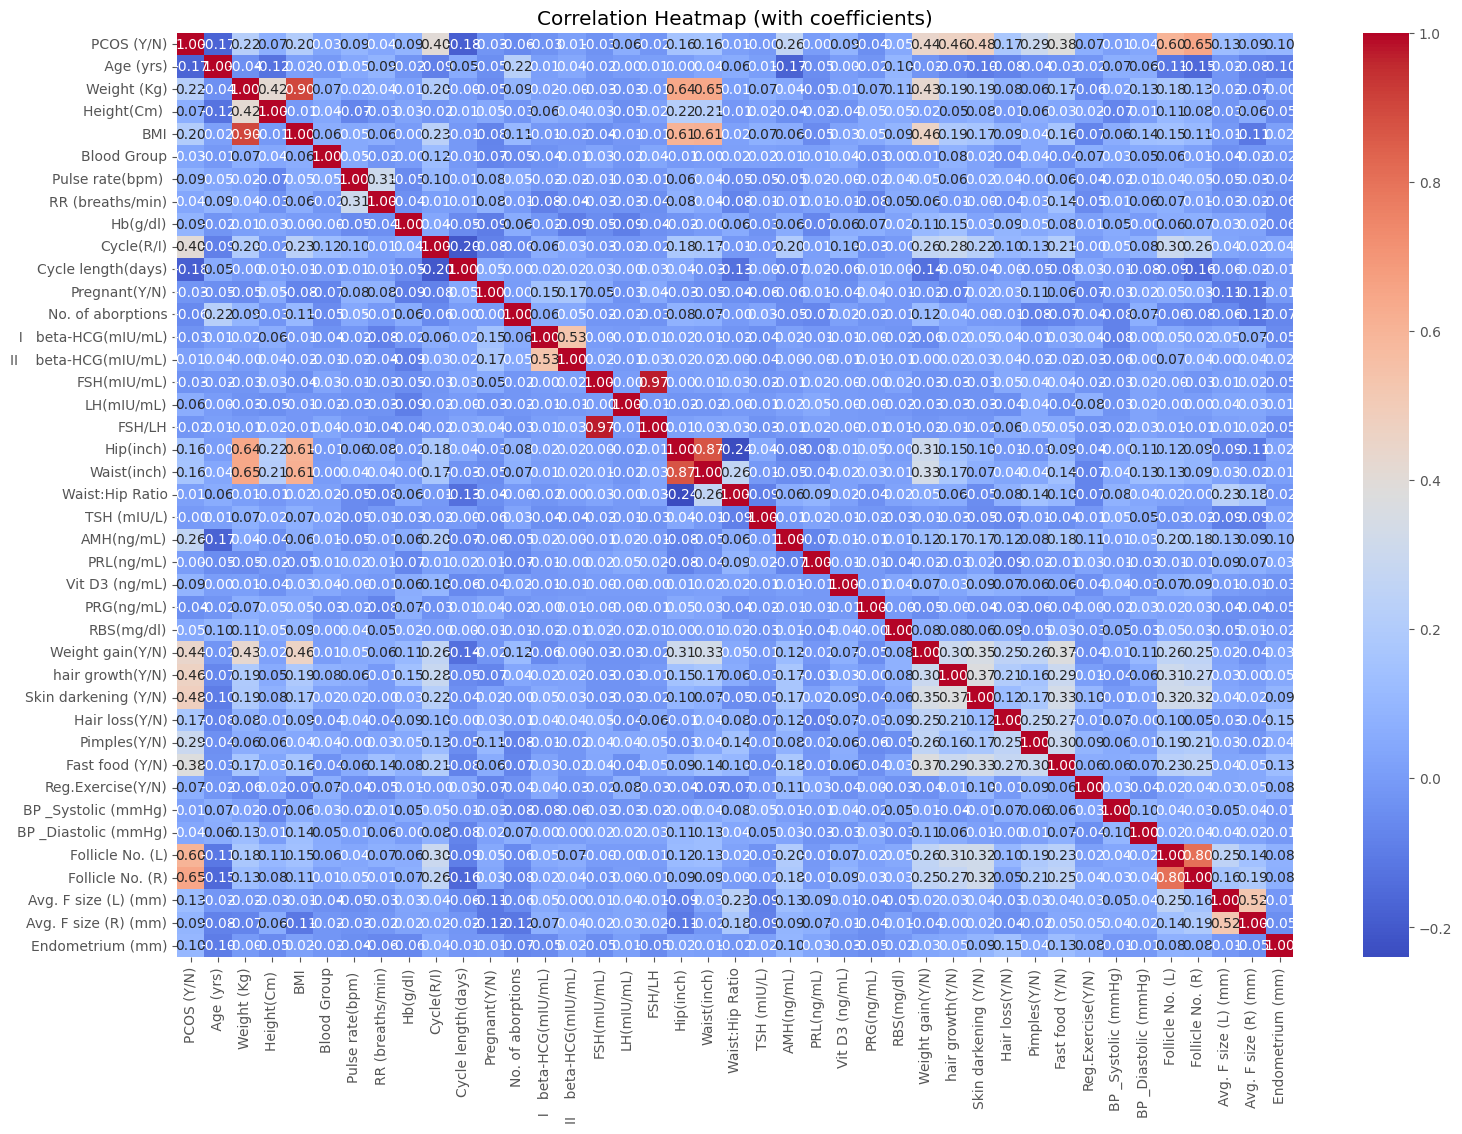

In [27]:
plt.figure(figsize=(18, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (with coefficients)')
plt.show()

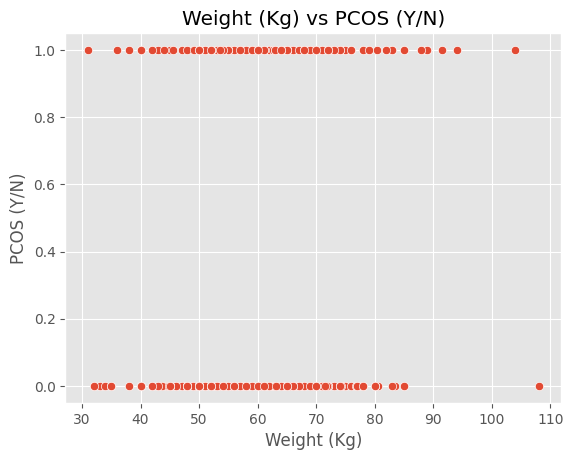

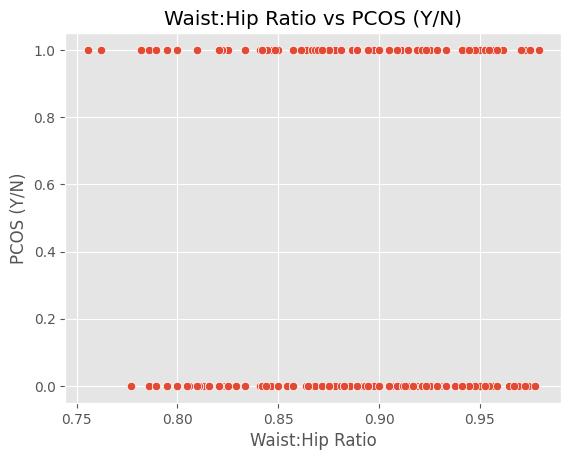

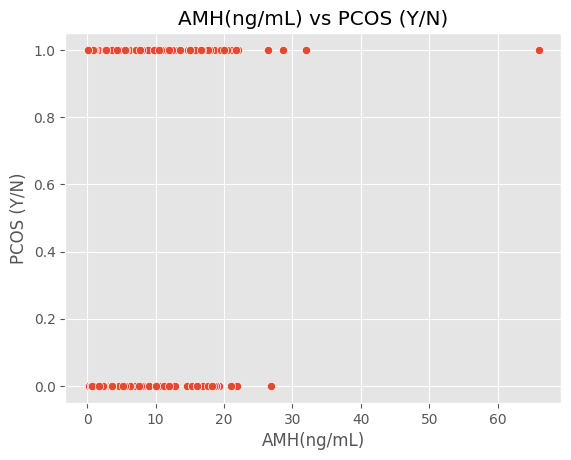

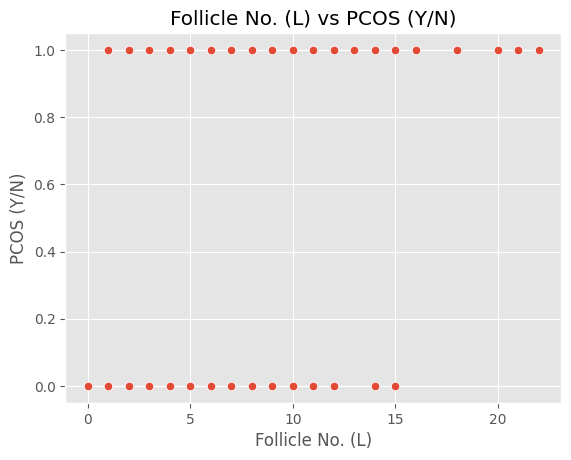

In [28]:
key_features = ['Weight (Kg)', 'Waist:Hip Ratio', 'AMH(ng/mL)', 'Follicle No. (L)']
for feature in key_features:
    sns.scatterplot(x=feature, y='PCOS (Y/N)', data=df)
    plt.title(f'{feature} vs PCOS (Y/N)')
    plt.show()

In [30]:
for feature in features_to_plot:
    sns.violinplot(x='PCOS (Y/N)', y=feature, data=df)
    plt.title(f'{feature} by PCOS (Y/N)')
    plt.show()
    

NameError: name 'features_to_plot' is not defined

In [31]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['PCOS (Y/N)'])
y = df['PCOS (Y/N)']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

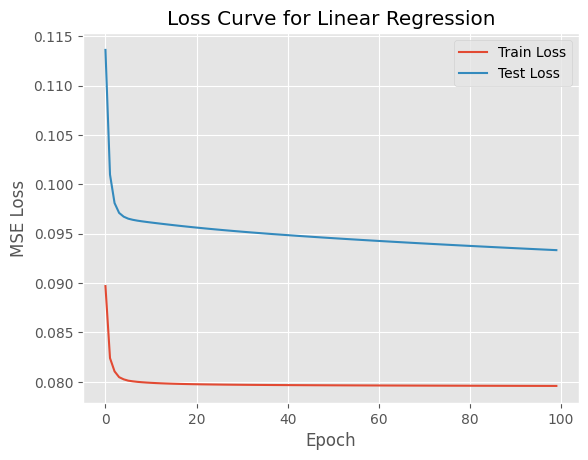

In [33]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Use SGDRegressor for gradient descent
lr = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
train_losses = []
test_losses = []

for i in range(1, 101):
    lr.partial_fit(X_train, y_train)
    train_pred = lr.predict(X_train)
    test_pred = lr.predict(X_test)
    train_losses.append(mean_squared_error(y_train, train_pred))
    test_losses.append(mean_squared_error(y_test, test_pred))

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Curve for Linear Regression')
plt.legend()
plt.show()

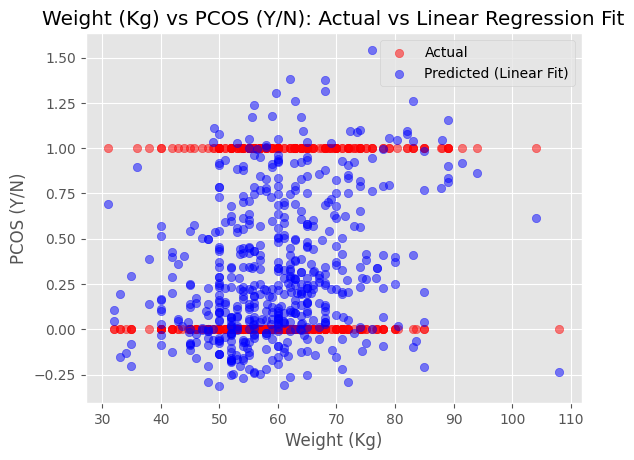

In [36]:
import numpy as np

# Choose a feature to plot against the target
feature = 'Weight (Kg)'

# Get the index of the feature in your X dataframe
feature_idx = list(df.drop(columns=['PCOS (Y/N)']).columns).index(feature)

# Get the original (unstandardized) feature values for plotting
X_feature = df[feature].values
y_true = df['PCOS (Y/N)'].values

# Get the model's predictions (using your trained linear regression model)
y_pred = lr.predict(X_scaled)

# Scatter plot of actual data
plt.scatter(X_feature, y_true, color='red', label='Actual', alpha=0.5)

# Scatter plot of predicted values (the "linear line")
plt.scatter(X_feature, y_pred, color='blue', label='Predicted (Linear Fit)', alpha=0.5)

plt.xlabel(feature)
plt.ylabel('PCOS (Y/N)')
plt.title(f'{feature} vs PCOS (Y/N): Actual vs Linear Regression Fit')
plt.legend()
plt.show()

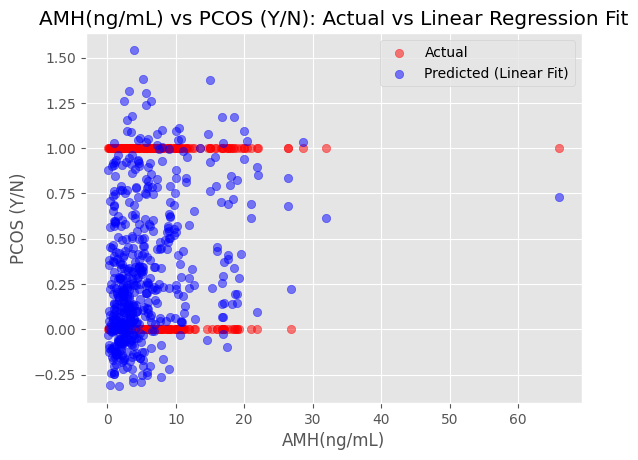

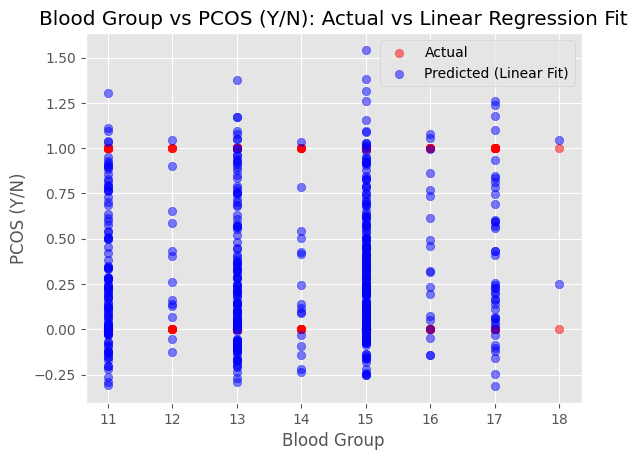

In [34]:
features_to_plot = ['AMH(ng/mL)', 'Blood Group'] 

for feature in features_to_plot:
    # Get the index of the feature in your X dataframe
    feature_idx = list(df.drop(columns=['PCOS (Y/N)']).columns).index(feature)
    X_feature = df[feature].values
    y_true = df['PCOS (Y/N)'].values
    y_pred = lr.predict(X_scaled)

    plt.scatter(X_feature, y_true, color='red', label='Actual', alpha=0.5)
    plt.scatter(X_feature, y_pred, color='blue', label='Predicted (Linear Fit)', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('PCOS (Y/N)')
    plt.title(f'{feature} vs PCOS (Y/N): Actual vs Linear Regression Fit')
    plt.legend()
    plt.show()

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression predictions (already trained as 'lr')
lr_pred = lr.predict(X_test)

print("Model Comparison on Test Set:")
print(f"Linear Regression - MSE: {mean_squared_error(y_test, lr_pred):.4f}, R2: {r2_score(y_test, lr_pred):.4f}")
print(f"Decision Tree      - MSE: {mean_squared_error(y_test, dt_pred):.4f}, R2: {r2_score(y_test, dt_pred):.4f}")
print(f"Random Forest      - MSE: {mean_squared_error(y_test, rf_pred):.4f}, R2: {r2_score(y_test, rf_pred):.4f}")

Model Comparison on Test Set:
Linear Regression - MSE: 0.0933, R2: 0.5673
Decision Tree      - MSE: 0.1759, R2: 0.1844
Random Forest      - MSE: 0.0807, R2: 0.6257


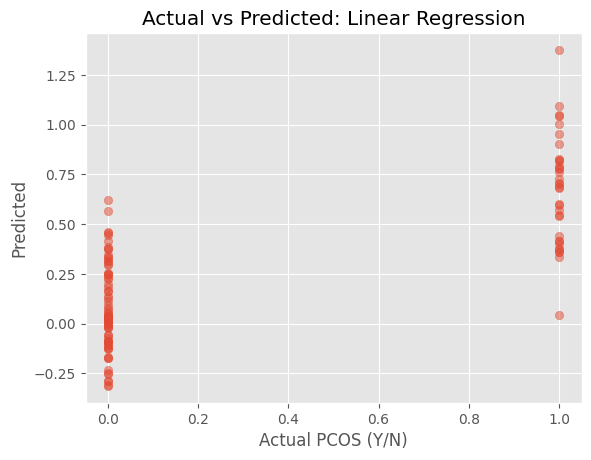

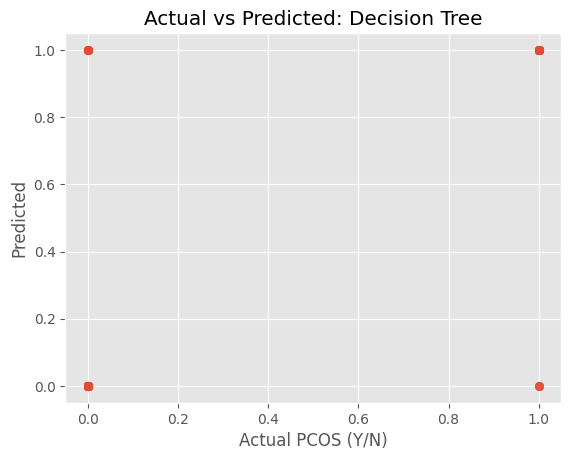

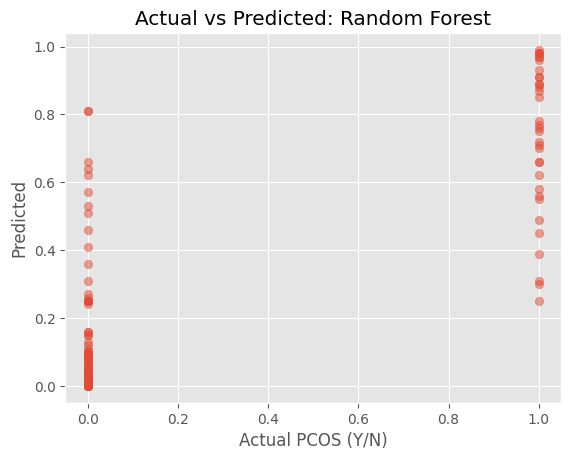

In [37]:
models = {'Linear Regression': lr_pred, 'Decision Tree': dt_pred, 'Random Forest': rf_pred}

for name, preds in models.items():
    plt.scatter(y_test, preds, alpha=0.5)
    plt.xlabel('Actual PCOS (Y/N)')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted: {name}')
    plt.show()

In [38]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, 'best_pcos_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Best model and scaler saved!")

Best model and scaler saved!


In [39]:
# Get the feature names in the order your model expects them
feature_names = df.drop(columns=['PCOS (Y/N)']).columns.tolist()
print("Feature order for prediction:")
for i, name in enumerate(feature_names):
    print(f"{i}: {name}")

Feature order for prediction:
0:  Age (yrs)
1: Weight (Kg)
2: Height(Cm) 
3: BMI
4: Blood Group
5: Pulse rate(bpm) 
6: RR (breaths/min)
7: Hb(g/dl)
8: Cycle(R/I)
9: Cycle length(days)
10: Pregnant(Y/N)
11: No. of aborptions
12:   I   beta-HCG(mIU/mL)
13: II    beta-HCG(mIU/mL)
14: FSH(mIU/mL)
15: LH(mIU/mL)
16: FSH/LH
17: Hip(inch)
18: Waist(inch)
19: Waist:Hip Ratio
20: TSH (mIU/L)
21: AMH(ng/mL)
22: PRL(ng/mL)
23: Vit D3 (ng/mL)
24: PRG(ng/mL)
25: RBS(mg/dl)
26: Weight gain(Y/N)
27: hair growth(Y/N)
28: Skin darkening (Y/N)
29: Hair loss(Y/N)
30: Pimples(Y/N)
31: Fast food (Y/N)
32: Reg.Exercise(Y/N)
33: BP _Systolic (mmHg)
34: BP _Diastolic (mmHg)
35: Follicle No. (L)
36: Follicle No. (R)
37: Avg. F size (L) (mm)
38: Avg. F size (R) (mm)
39: Endometrium (mm)


In [40]:
# Get feature importance from your Random Forest
feature_importance = rf.feature_importances_
feature_names = df.drop(columns=['PCOS (Y/N)']).columns

# Create a dataframe to see which features are most important
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False)
print("Top 10 Most Important Features:")
print(importance_df.head(10))

Top 10 Most Important Features:
                 Feature  Importance
36      Follicle No. (R)    0.453508
35      Follicle No. (L)    0.061867
27      hair growth(Y/N)    0.041674
26      Weight gain(Y/N)    0.041087
16                FSH/LH    0.024613
24            PRG(ng/mL)    0.024065
28  Skin darkening (Y/N)    0.023757
20           TSH (mIU/L)    0.023477
21            AMH(ng/mL)    0.019960
14           FSH(mIU/mL)    0.017034


In [41]:
# Features users can realistically provide
user_friendly_features = [
    'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
    'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
    'Hair loss(Y/N)', 'Pimples(Y/N)'
]

In [42]:
# Features that users can easily provide
user_friendly_features = [
    'Age (yrs)',
    'Weight (Kg)', 
    'Height(Cm)',
    'BMI',
    'Weight gain(Y/N)',
    'hair growth(Y/N)',
    'Skin darkening (Y/N)',
    'Hair loss(Y/N)',
    'Pimples(Y/N)',
    'Fast food (Y/N)',
    'Reg.Exercise(Y/N)'
]

# Create simplified dataset
df_simple = df[user_friendly_features + ['PCOS (Y/N)']]
print(f"Simplified dataset shape: {df_simple.shape}")
print(f"Features: {user_friendly_features}")

KeyError: "['Age (yrs)', 'Height(Cm)'] not in index"

In [43]:
# Check what columns you actually have
print("Available columns in your dataset:")
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")
    

Available columns in your dataset:
0: 'PCOS (Y/N)'
1: ' Age (yrs)'
2: 'Weight (Kg)'
3: 'Height(Cm) '
4: 'BMI'
5: 'Blood Group'
6: 'Pulse rate(bpm) '
7: 'RR (breaths/min)'
8: 'Hb(g/dl)'
9: 'Cycle(R/I)'
10: 'Cycle length(days)'
11: 'Pregnant(Y/N)'
12: 'No. of aborptions'
13: '  I   beta-HCG(mIU/mL)'
14: 'II    beta-HCG(mIU/mL)'
15: 'FSH(mIU/mL)'
16: 'LH(mIU/mL)'
17: 'FSH/LH'
18: 'Hip(inch)'
19: 'Waist(inch)'
20: 'Waist:Hip Ratio'
21: 'TSH (mIU/L)'
22: 'AMH(ng/mL)'
23: 'PRL(ng/mL)'
24: 'Vit D3 (ng/mL)'
25: 'PRG(ng/mL)'
26: 'RBS(mg/dl)'
27: 'Weight gain(Y/N)'
28: 'hair growth(Y/N)'
29: 'Skin darkening (Y/N)'
30: 'Hair loss(Y/N)'
31: 'Pimples(Y/N)'
32: 'Fast food (Y/N)'
33: 'Reg.Exercise(Y/N)'
34: 'BP _Systolic (mmHg)'
35: 'BP _Diastolic (mmHg)'
36: 'Follicle No. (L)'
37: 'Follicle No. (R)'
38: 'Avg. F size (L) (mm)'
39: 'Avg. F size (R) (mm)'
40: 'Endometrium (mm)'


In [44]:
# Corrected feature names based on your actual columns
user_friendly_features = [
    ' Age (yrs)',  # Note the space at the beginning
    'Weight (Kg)', 
    'Height(Cm) ',  # Note the space at the end
    'BMI',
    'Weight gain(Y/N)',
    'hair growth(Y/N)',  # Note: lowercase 'hair'
    'Skin darkening (Y/N)',
    'Hair loss(Y/N)',
    'Pimples(Y/N)',
    'Fast food (Y/N)',
    'Reg.Exercise(Y/N)'
]

# Create simplified dataset
df_simple = df[user_friendly_features + ['PCOS (Y/N)']]
print(f"Simplified dataset shape: {df_simple.shape}")
print(f"Features: {user_friendly_features}")

Simplified dataset shape: (537, 12)
Features: [' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']


In [45]:
# Separate features and target
X_simple = df_simple.drop(columns=['PCOS (Y/N)'])
y_simple = df_simple['PCOS (Y/N)']

# Standardize features
scaler_simple = StandardScaler()
X_simple_scaled = scaler_simple.fit_transform(X_simple)

# Train/test split
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple_scaled, y_simple, test_size=0.2, random_state=42
)

In [46]:
# Train all three models on simplified data
lr_simple = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
dt_simple = DecisionTreeRegressor(random_state=42)
rf_simple = RandomForestRegressor(random_state=42)

lr_simple.fit(X_train_simple, y_train_simple)
dt_simple.fit(X_train_simple, y_train_simple)
rf_simple.fit(X_train_simple, y_train_simple)

# Make predictions
lr_pred_simple = lr_simple.predict(X_test_simple)
dt_pred_simple = dt_simple.predict(X_test_simple)
rf_pred_simple = rf_simple.predict(X_test_simple)

In [47]:
print("Simplified Model Comparison:")
print(f"Linear Regression - MSE: {mean_squared_error(y_test_simple, lr_pred_simple):.4f}, R2: {r2_score(y_test_simple, lr_pred_simple):.4f}")
print(f"Decision Tree      - MSE: {mean_squared_error(y_test_simple, dt_pred_simple):.4f}, R2: {r2_score(y_test_simple, dt_pred_simple):.4f}")
print(f"Random Forest      - MSE: {mean_squared_error(y_test_simple, rf_pred_simple):.4f}, R2: {r2_score(y_test_simple, rf_pred_simple):.4f}")

Simplified Model Comparison:
Linear Regression - MSE: 0.1399, R2: 0.3515
Decision Tree      - MSE: 0.2963, R2: -0.3736
Random Forest      - MSE: 0.1509, R2: 0.3005


In [48]:
# Save the best simplified model
joblib.dump(lr_simple, 'best_pcos_model_simple.pkl')
joblib.dump(scaler_simple, 'scaler_simple.pkl')

print("Best simplified model (Linear Regression) saved!")

Best simplified model (Linear Regression) saved!
